IA & Data science (LU3IN0226) -- 2023-2024
--------
*&copy; Equipe pédagogique: Téo Guichoux, Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# TD-TME10: apprentissage supervisé appliqué à un dataset

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Tiphaine GAYET

Le nom de chaque membre du binôme doit être indiqué, et **un seul rendu sur un des deux comptes Moodle doit être fait**.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *tme-10-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# TDTME 10 - mini-projet 2024


<font size="+1" color="RED"><b>Date de rendu : lundi 29 avril 2024, avant 19h</b></font>
    
<b>Attention!</b> les soumissions après lundi 29 avril 19h se verront appliquer un malus dans la note:
- retard de moins d'une heure : 0 malus
- retard entre 1h et 24h : malus de 2pts
- retard entre 24h à 48h : malus de 5pts
- retard supérieur à 48h : noté 0.


## Travail à faire

Appliquer les algorithmes d'**apprentissage supervisé** vus depuis le début du semestre sur les données afin de mettre en évidence des résultats intéressants (temps d'exécution, taux de bonne classification,...).
Vous devez utiliser tout ce qui a été fait dans les séances de TDTME 1 à 8 et vous devez comparer les algorithmes suivantes:
- les k plus proches voisins
- le perceptron (n'importe quelle variante)
- les arbres de décision

Votre comparaison doit utiliser une validation croisée.


## Travail à rendre

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage.

Ce qui doit être remis : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.

**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.



In [2]:
# Importation de librairies standards:conda config --set auto_activate_base True
import numpy as np
import pandas as pd
import random
import graphviz as gv
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : Pen-Based Recognition of Handwritten Digits

documentation: <a href="https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits" target="NEW">page UCI</a> (mais l'essentiel est donné ci-après).

Pour télécharger les données, la façon la plus simple est d'installer la librairie de l'UCI:

    pip install -U ucimlrepo

ensuite, on peut lancer la boîte suivante.


### Chargement des données

In [3]:
pip install -U ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [7]:
from ucimlrepo import fetch_ucirepo,list_available_datasets

# check which datasets can be imported
#list_available_datasets()

# import dataset
pen_dataset = fetch_ucirepo(id=81)
gv
# access data
X = pen_dataset.data.features
y = pen_dataset.data.targets

# access metadata
print(pen_dataset.metadata.uci_id)
print(pen_dataset.metadata.num_instances)
print(pen_dataset.metadata.additional_info.summary)

# access variable info in tabular format
print(pen_dataset.variables)

81
10992
We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds. 

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution.  Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to wr

In [8]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0
10988,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14
10989,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93
10990,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81


In [9]:
y

,Class
0,8
1,2
2,1
3,4
4,1
...,...
10987,4
10988,2
10989,0
10990,0


In [ ]:
np.unique(y.Class)'apprentissage supervisé

### Extraction des données en un dataset d'apprentissage et un dataset de test

In [7]:
# Initialisation des df pour stocker les données d'apprentissage et de test
train_desc = pd.DataFrame([],columns=X.columns)
train_label = pd.DataFrame([],columns=y.columns)
test_desc = pd.DataFrame([],columns=X.columns)      
test_label = pd.DataFrame([],columns=y.columns)

# Parcours de chaque classe
classes = np.unique(y.Class)
desc_test_par_classe = []
label_test_par_classe = []
for classe in classes:
    # Indices des exemples de la classe courante
    indices_classe = np.array(y.loc[y['Class'] == classe].index)
    
    # Sélection de la moitié des indices pour la base d'apprentissage et l'autre moitié pour la base de test
    random.shuffle(indices_classe)
    #split_index = len(indices_classe) // 2
    indices_train = indices_classe[:500]
    indices_test = indices_classe[500:]
 
    # Ajout aux bases de test et d'apprentissage
    desc_test_par_classe.append(X.iloc[indices_test])
    label_test_par_classe.append(y.iloc[indices_test])
    train_desc = pd.concat([train_desc, X.iloc[indices_train]])
    train_label= pd.concat([train_label, y.iloc[indices_train]])
    test_desc  = pd.concat([test_desc, desc_test_par_classe[-1]])
    test_label = pd.concat([test_label, label_test_par_classe[-1]])


#print(train_desc, train_label), (test_desc, test_label)

In [8]:
print(train_desc.shape)
print(train_label.shape)
print(test_desc.shape)
print(test_label.shape)

(5000, 16)
(5000, 1)
(5992, 16)
(5992, 1)


## Expérimentations

### Algorithme des K plus proches voisins - Implémentation du Classifier KNN multi-classe

Le classifieur KNN déjà défini est conçu pour fonctionner sur un problème de classification binaire. Implémentons un classifieur KNN avec l'approche du "vote majoritaire" pour le rendre compatible avec la classification multi-classes.



In [11]:
class ClassifierKNN_MC(classif.Classifier):
    """ Classe pour représenter un classifieur par K plus proches voisins.
        Cette classe hérite de la classe Classifier'
    """
    
    def __init__(self, input_dimension, k):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - k (int) : nombre de voisins à considérer
            Hypothèse : input_dimension > 0
        """
        super().__init__(input_dimension)
        self.k = k
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        self.desc_set = desc_set
        self.label_set = label_set
        
            
    def predict(self, x):
        """ Rend la prédiction sur x en utilisant le vote majoritaire.
            x: une description : un ndarray
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
        """
        # Calculer les distances entre x et toutes les descriptions dans desc_set
        distances = [np.linalg.norm(x - y) for y in self.desc_set]
        
        # Trier les indices des descriptions en fonction de leurs distances par rapport à x
        sorted_indices = np.argsort(distances)

         # Sélectionner les k premières étiquettes correspondant aux k voisins les plus proches
        k_nearest_labels = self.label_set[sorted_indices[:self.k]].flatten()
        
        # Compter le nombre d'occurrences de chaque étiquette
        label_counts = {}
        for label in np.unique(self.label_set):
            label_counts[label] = 0

        for label in k_nearest_labels:
            label_counts[label] = label_counts[label] + 1
        
        
        # Trouver l'étiquette avec le plus grand nombre d'occurrences
        majority_vote = max(label_counts, key=label_counts.get)
        return majority_vote

   

In [264]:
# Entrainement du classifieur avec k = 5
knn5_classifier = ClassifierKNN_MC(input_dimension=16, k=5)
knn5_classifier.train(train_desc.values, train_label.values)

In [265]:
t1 = time.perf_counter()
acc = knn5_classifier.accuracy(train_desc.values,train_label.values)
t2 = time.perf_counter()

print("Taux de bonne classification sur le dataset d'apprentissage: ", acc)
print("Temps: ", t2-t1)

Taux de bonne classification sur le dataset d'apprentissage:  0.9912
Temps:  268.66884527


In [266]:
t1 = time.perf_counter()
acc = knn5_classifier.accuracy(test_desc.values,test_label.values)
t2 = time.perf_counter()

print("Taux de bonne classification sur le dataset de test: ", acc)
print("Temps: ", t2-t1)

Taux de bonne classification sur le dataset de test:  0.9899866488651535
Temps:  322.27281022699754


In [269]:
# Entrainement du classifieur avec k = 3
knn3_classifier = ClassifierKNN_MC(input_dimension=16, k=3)
knn3_classifier.train(train_desc.values, train_label.values)

In [270]:
t1 = time.perf_counter()
acc = knn3_classifier.accuracy(test_desc.values,test_label.values)
t2 = time.perf_counter()

print("Taux de bonne classification sur le dataset: ", acc)
print("Temps: ", t2-t1)

Taux de bonne classification sur le dataset:  0.9914886515353805
Temps:  322.1870204959996


#### On s'interesse maintenant à l'accuracy par numéro

In [271]:
for i in range(10) :
    t1 = time.perf_counter()
    acc = knn5_classifier.accuracy(desc_test_par_classe[i].values,label_test_par_classe[i].values)
    t2 = time.perf_counter()
    
    print(f"Taux de bonne classification pour la classe {i} : ", acc)
    print("Temps: ", t2-t1)

Taux de bonne classification pour la classe 0 :  0.9984447900466563
Temps:  38.832650937001745
Taux de bonne classification pour la classe 1 :  0.9657853810264385
Temps:  38.7893266300016
Taux de bonne classification pour la classe 2 :  0.9984472049689441
Temps:  38.78769587399802
Taux de bonne classification pour la classe 3 :  0.9981981981981982
Temps:  33.55662082700292
Taux de bonne classification pour la classe 4 :  0.9937888198757764
Temps:  38.77829158299937
Taux de bonne classification pour la classe 5 :  0.990990990990991
Temps:  33.51085009700182
Taux de bonne classification pour la classe 6 :  0.9982014388489209
Temps:  33.44997473699914
Taux de bonne classification pour la classe 7 :  0.9844236760124611
Temps:  38.786537822001264
Taux de bonne classification pour la classe 8 :  0.9855855855855856
Temps:  33.80022359299983
Taux de bonne classification pour la classe 9 :  0.9873873873873874
Temps:  33.85277913400205


### Perceptron

On utilise le classifieur multi-classes One Against All 

In [284]:
perceptron = classif.ClassifierPerceptron(input_dimension=16)
clf_multi_oaa = classif.ClassifierMultiOAA(2, perceptron)

In [285]:
t1 = time.perf_counter()
clf_multi_oaa.train(train_desc.values, train_label.values)
t2 = time.perf_counter()

print("Temps d'entrainement: ", t2-t1)

Temps d'entrainement:  97.88368633999926


In [286]:
t1 = time.perf_counter()
acc = clf_multi_oaa.accuracy(train_desc.values,train_label.values)
t2 = time.perf_counter()

print("Taux de bonne classification sur le dataset d'apprentissage: ", acc)
print("Temps: ", t2-t1)

[0 0 0 ... 9 9 9] [0 0 9 ... 9 9 9]
Taux de bonne classification sur le dataset d'apprentissage:  0.873
Temps:  0.19381182199867908


In [287]:
t1 = time.perf_counter()
acc = clf_multi_oaa.accuracy(test_desc.values,test_label.values)
t2 = time.perf_counter()

print("Taux de bonne classification sur le dataset de test: ", acc)
print("Temps: ", t2-t1)

[0 0 0 ... 9 9 9] [0 0 6 ... 9 9 9]
Taux de bonne classification sur le dataset de test:  0.8808411214953271
Temps:  0.2540347069989366


### Arbre de décision

In [15]:
train_desc

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
8199,23,93,5,56,19,13,68,0,100,35,92,79,45,100,0,78
5155,87,78,50,94,16,59,0,19,45,0,99,24,100,63,67,100
9730,38,90,0,75,0,32,42,0,93,23,100,66,60,100,1,94
9888,0,62,11,17,45,0,80,14,100,52,86,92,49,100,16,83
9394,76,49,70,92,27,100,0,66,3,19,41,0,80,21,100,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,45,100,0,93,33,74,53,80,70,45,100,15,63,0,10,2
9868,95,77,46,100,5,71,54,55,95,75,100,28,62,0,0,6
10658,100,89,57,56,6,63,37,100,94,92,92,50,61,12,0,0
2395,88,64,93,100,41,87,48,61,100,70,90,31,55,0,0,4


In [12]:
attributs = np.array(X.columns)

Temps:  27.971857965996605
Cet arbre possède  262  feuilles.


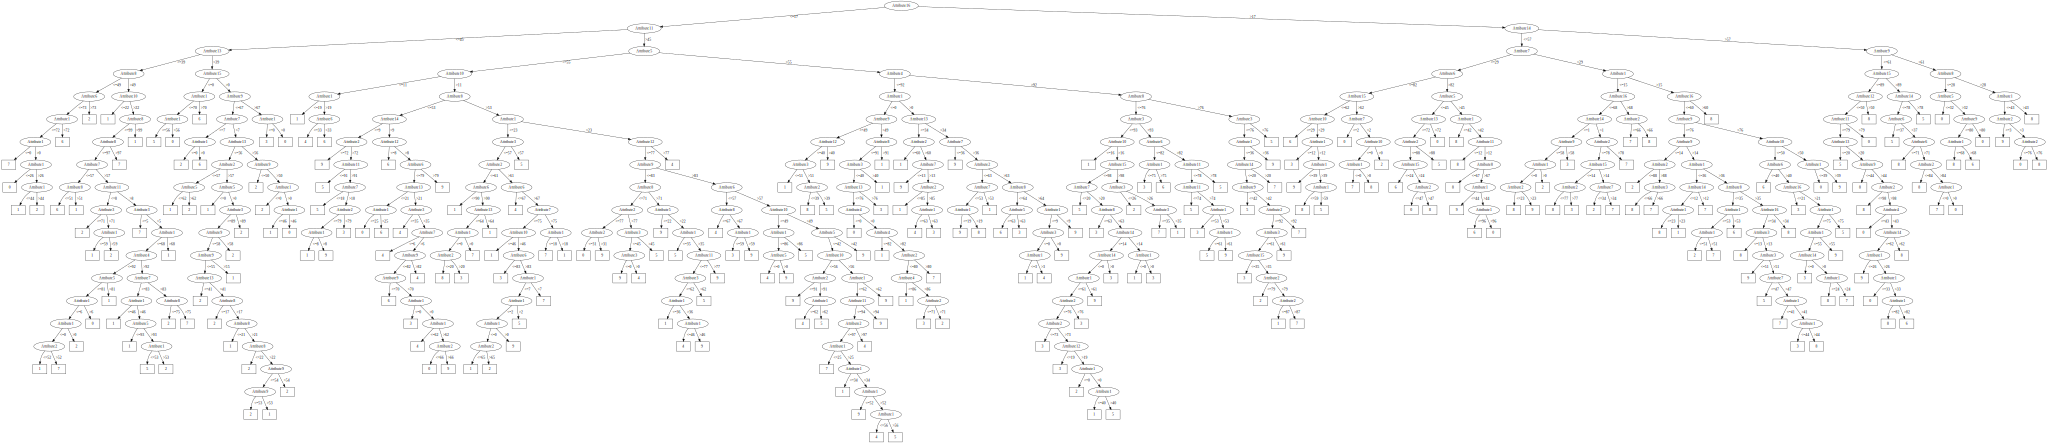

In [59]:
# Initialiation d'un arbre pour le dataset :
arbre = classif.ClassifierArbreNumerique(len(attributs), 0.0, attributs)

# Construction de l'arbre de décision à partir du dataset d'entrainement
t1 = time.perf_counter()
arbre.train(train_desc.values,train_label.values.flatten())
t2 = time.perf_counter()
print("Temps: ", t2-t1)

# Construction de la représentation graphique (affichage)
graphe_arbre = gv.Digraph(format='png')
arbre.affiche(graphe_arbre)

# Affichage du graphe obtenu:
print("Cet arbre possède ",arbre.number_leaves()," feuilles.")
graphe_arbre

In [60]:
t1 = time.perf_counter()
acc = arbre.accuracy(train_desc.values,train_label.values.flatten())
t2 = time.perf_counter()

print("Taux de bonne classification pour les données d'entrainement : ", acc)
print("Temps: ", t2-t1)

Taux de bonne classification pour les données d'entrainement :  0.9868
Temps:  0.029650249998667277


In [61]:
t1 = time.perf_counter()
acc = arbre.accuracy(test_desc.values,test_label.values.flatten())
t2 = time.perf_counter()

print("Taux de bonne classification pour les données de test : ", acc)
print("Temps: ", t2-t1)

Taux de bonne classification pour les données de test :  0.9354138851802403
Temps:  0.03933547499764245


### Comparaison des modèles avec validation croisée

In [18]:
nb_iter = 4
acc = []
t1 = time.perf_counter()
knn_classifier = ClassifierKNN_MC(input_dimension=16, k=5)
(perf, taux_moyen, taux_ecart) = ev.validation_croisee(knn_classifier, [X.values, y.values.flatten()], nb_iter)
t2 = time.perf_counter()

print("Temps: ", t2-t1)
print(f"Accuracy moyenne : {taux_moyen}   Ecart-type : {taux_ecart}")

Itération 0 : taille base app.= 8249	taille base test= 2743	Taux de bonne classif:  0.9938
Itération 1 : taille base app.= 8249	taille base test= 2743	Taux de bonne classif:  0.9883
Itération 2 : taille base app.= 8249	taille base test= 2743	Taux de bonne classif:  0.9931
Itération 3 : taille base app.= 8249	taille base test= 2743	Taux de bonne classif:  0.9872
Temps:  801.9312935379999
Accuracy moyenne : 0.9906124681006199   Ecart-type : 0.002863339058039542


In [20]:
nb_iter = 4
acc = []
t1 = time.perf_counter()
arbren = classif.ClassifierArbreNumerique(len(X.columns), 0.0, X.columns)
(perf2, taux_moyen2, taux_ecart2) = ev.validation_croisee(arbren, [X.values, y.values.flatten()], nb_iter)
t2 = time.perf_counter()

print("Temps: ", t2-t1)
print(f"Accuracy moyenne : {taux_moyen2}   Ecart-type : {taux_ecart2}")

Itération 0 : taille base app.= 8249	taille base test= 2743	Taux de bonne classif:  0.9442
Itération 1 : taille base app.= 8249	taille base test= 2743	Taux de bonne classif:  0.9515
Itération 2 : taille base app.= 8249	taille base test= 2743	Taux de bonne classif:  0.9435
Itération 3 : taille base app.= 8249	taille base test= 2743	Taux de bonne classif:  0.9464
Temps:  72.31155271499938
Accuracy moyenne : 0.9464090411957711   Ecart-type : 0.003136101081677949


In [21]:
nb_iter = 4
acc = []
t1 = time.perf_counter()
percep = classif.ClassifierPerceptron(input_dimension=16)
multi_oaa = classif.ClassifierMultiOAA(2, percep)
(perf3, taux_moyen3, taux_ecart3) = ev.validation_croisee(multi_oaa, [X.values, y.values.flatten()], nb_iter)
t2 = time.perf_counter()

print("Temps: ", t2-t1)
print(f"Accuracy moyenne : {taux_moyen3}   Ecart-type : {taux_ecart3}")

Itération 0 : taille base app.= 8249	taille base test= 2743	Taux de bonne classif:  0.8469
Itération 1 : taille base app.= 8249	taille base test= 2743	Taux de bonne classif:  0.8771
Itération 2 : taille base app.= 8249	taille base test= 2743	Taux de bonne classif:  0.8852
Itération 3 : taille base app.= 8249	taille base test= 2743	Taux de bonne classif:  0.8064
Temps:  353.3715544710003
Accuracy moyenne : 0.8539008384979949   Ecart-type : 0.03090892429672098


In [24]:
nb_iter = 10
acc = []
t1 = time.perf_counter()
percep2 = classif.ClassifierPerceptron(input_dimension=16)
multi_oaa2 = classif.ClassifierMultiOAA(2, percep2)
(perf4, taux_moyen4, taux_ecart4) = ev.validation_croisee(multi_oaa2, [X.values, y.values.flatten()], nb_iter)
t2 = time.perf_counter()

print("Temps: ", t2-t1)
print(f"Accuracy moyenne : {taux_moyen4}   Ecart-type : {taux_ecart4}")

Itération 0 : taille base app.= 9897	taille base test= 1095	Taux de bonne classif:  0.9215
Itération 1 : taille base app.= 9897	taille base test= 1095	Taux de bonne classif:  0.9014
Itération 2 : taille base app.= 9897	taille base test= 1095	Taux de bonne classif:  0.9014
Itération 3 : taille base app.= 9897	taille base test= 1095	Taux de bonne classif:  0.8968
Itération 4 : taille base app.= 9897	taille base test= 1095	Taux de bonne classif:  0.9105
Itération 5 : taille base app.= 9897	taille base test= 1095	Taux de bonne classif:  0.8210
Itération 6 : taille base app.= 9897	taille base test= 1095	Taux de bonne classif:  0.8858
Itération 7 : taille base app.= 9897	taille base test= 1095	Taux de bonne classif:  0.8429
Itération 8 : taille base app.= 9897	taille base test= 1095	Taux de bonne classif:  0.8402
Itération 9 : taille base app.= 9897	taille base test= 1095	Taux de bonne classif:  0.8749
Temps:  1061.3585291640002
Accuracy moyenne : 0.8796347031963471   Ecart-type : 0.03216323

In [25]:
nb_iter = 4
acc = []
t1 = time.perf_counter()
percep3 = classif.ClassifierPerceptron(input_dimension=16)
multi_oaa3 = classif.ClassifierMultiOAA(16, percep3)
(perf5, taux_moyen5, taux_ecart5) = ev.validation_croisee(multi_oaa3, [X.values, y.values.flatten()], nb_iter)
t2 = time.perf_counter()

print("Temps: ", t2-t1)
print(f"Accuracy moyenne : {taux_moyen5}   Ecart-type : {taux_ecart5}")

Itération 0 : taille base app.= 8249	taille base test= 2743	Taux de bonne classif:  0.9038
Itération 1 : taille base app.= 8249	taille base test= 2743	Taux de bonne classif:  0.8217
Itération 2 : taille base app.= 8249	taille base test= 2743	Taux de bonne classif:  0.8629
Itération 3 : taille base app.= 8249	taille base test= 2743	Taux de bonne classif:  0.8516
Temps:  361.752011345
Accuracy moyenne : 0.8600072912869122   Ecart-type : 0.02940228963534108
